<a href="https://colab.research.google.com/github/pedsrc/data_science/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

A cada dia os cartões de crédito ganham mais espaço quando se fala de meios de pagamento. Os cheques já estão quase extintos, e as cédulas de dinheiro também caminham para esse destino. Porém, com o avanço da tecnologia, houve um grande aumento das transações online abrindo portas para as tentativas de fraudes a cartões de crédito, sendo as mais comuns a clonagem de cartões, o gerador de números falsos de cartões e ligações/mensagens falsas para roubo de dados.

Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://github.com/pedsrc/data_science/blob/pedsrc-patch-covid/28402.jpg?raw=true" width="60%"></p>

As instituições financeiras vêm lutando para controlar o aumento das fraudes e consequentemente dos prejuízos causados pelas mesmas tomando medidas preventivas, algumas delas são os processos de validação de identidade, como biometria facial e leitura de documentos, e o investimento em inteligência artificial e análise de dados, de modo a ter um histórico financeiro e hábitos de compra de cada cliente e utilizar algoritmos de machine learning para detectar fraudes, o que será feito nesse projeto.

Mesmo com todas as medidas tomadas pelas instituições financeiras para prever fraudes, ainda temos algumas falhas. A quantidade de operações que são consideradas como falso positivas, por exemplo, quando o cartão é bloqueado na tentativa de uma compra ainda são grandes, evidenciando que ainda é preciso investir bastante no algoritmos de segurança, principalmente para evitar constrangimento entre o cliente a a instituição financeira e economizar dinheiro de ambos os lados.

## Importação dos Dados

Os dados para análise foram importados do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), maior comunidade de Data Science e Machine Learning do mundo, que disponibiliza datasets e desafios.

O conjunto de dados abrange transações feitas com cartões de crédito em Setembro de 2013 na Europa.

Além disso, o *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações. O *dataset* está altamente desbalanceado representado fraudes para apenas 0.172% das transações.

As variáveis são todas numéricas que são o resultado de transformações PCA (Principal Component Analysis), para evitar problemas de privacidade e segurança. Por isso todas elas foram descaracterizadas, sem mostrar o nome e qualquer informação sobre as variáveis, representadas com os nomes $[V1, V2, V3 \dots, V28]$.

As únicas colunas que que não foram transformadas são as colunas `Time` (tempo em segundos passados entre cada transação e a primeira transação do dataset), `Amount` (valor das transações) e `Class` (variável responsiva, que contém o valor 1 para fraude e o valor 0 para transações normais).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

In [1]:
# instalar os pacotes necessários
!pip install -q scikit-plot

# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Com o intuito de facilitar a aquisição dos dados, foi criado um *link* com acesso direto ao `csv`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

## Análise Exploratória dos Dados

Para iniciar a análise dos dados o primeiro passo é verificar como o conjunto de dados está estruturado, observando como estão as 5 primeiras entradas do mesmo, qual o seu tamanho e seus tipos de variáveis.

In [3]:
# verificar as 5 primeiras entradas 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# verificar o tamanho do dataset
df.shape

(284807, 31)

In [5]:
# verificar o tipo de cada variável
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Uma das análises mais importantes para o começo do projeto, é o resumo estatístico de todas as variáveis do dataset, onde já é possível observar se existe ou não algum dado discrepante que pode prejudicar a análise.

In [6]:
# verificar o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Um outro possível alerta de que há algum dado que pode atrapalhar a análise, é considerar a verificação da porcentagem de dados vazios.

In [7]:
# verificar a porcentagem de dados nulos
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Com todos os dados prontos para serem trabalhados, e para uma maior confiança do modelo de Machine Learning, é necessário verificar o balanceamento dos dados, essa análise é importante para impedir uma tendência de "alarmes falsos" do modelo, que pode priorizar os dados majoritários em detrimento do desempenho para os dados minoritários, no caso, a quantidade de valores que indicam fraude ou não.

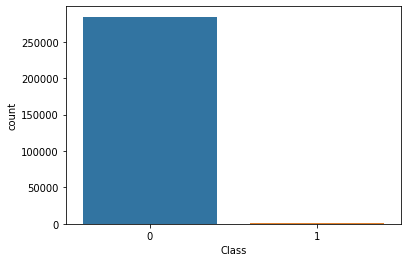

In [8]:
# plotar um gráfico de barras para verificar o balanceamento dos dados
fig, ax = plt.subplots()

sns.countplot("Class", data=df, ax=ax);

O volume de fraudes também deve ser indicado, com os histogramas das variáveis `Time` e `Amount` é possível ver esse volume.

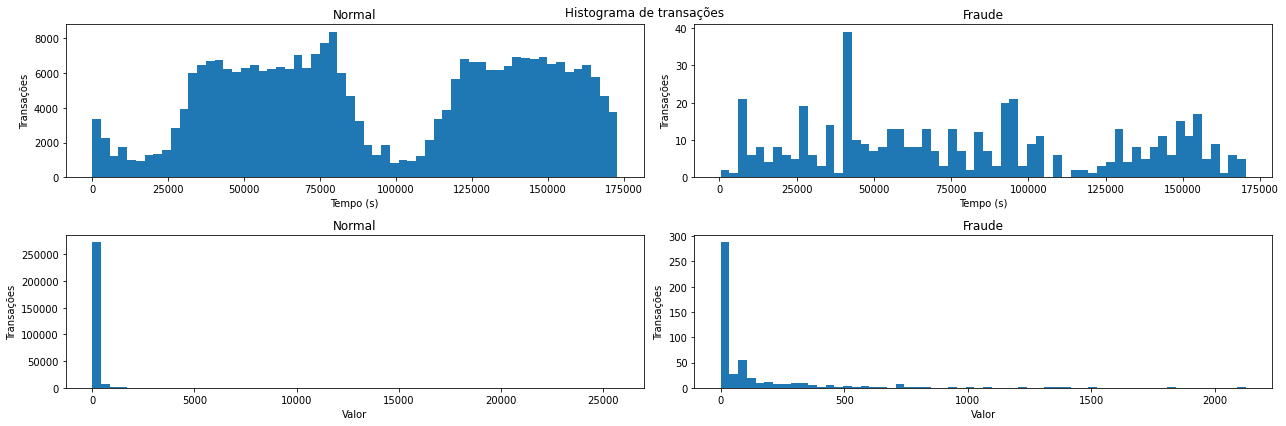

In [9]:
# plotar um histograma para a variável Time
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,6))
fig.suptitle('Histograma de transações')

ax[0][0].hist(df.Time[df.Class == 0], bins=60)
ax[0][0].set_title('Normal')
ax[0][0].set_xlabel('Tempo (s)')
ax[0][0].set_ylabel('Transações')

ax[0][1].hist(df.Time[df.Class == 1], bins=60)
ax[0][1].set_title('Fraude')
ax[0][1].set_xlabel('Tempo (s)')
ax[0][1].set_ylabel('Transações')

ax[1][0].hist(df.Amount[df.Class == 0], bins=60)
ax[1][0].set_title('Normal')
ax[1][0].set_xlabel('Valor')
ax[1][0].set_ylabel('Transações')

ax[1][1].hist(df.Amount[df.Class == 1], bins=60)
ax[1][1].set_title('Fraude')
ax[1][1].set_xlabel('Valor')
ax[1][1].set_ylabel('Transações')

plt.tight_layout()

É interessante também analisar estatísticamente onde se encaixam os valores das maiorias das transações e seus limites.

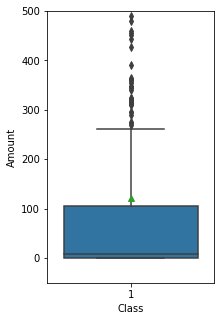

In [10]:
# plotar um boxplot
fig, ax = plt.subplots(figsize=(3,5))
df_fraude = df.loc[df['Class'] == 1]
#df_fraude.boxplot('Amount', ax=ax);
sns.boxplot(df_fraude.Class, df_fraude.Amount, showmeans=True, ax=ax)
plt.ylim((-50, 500))

plt.tight_layout;

## Modelo de Machine Learning

Machine Learning ou aprendizado de máquina, é uma aplicação de inteligência artificial que proporciona aos sistemas a habilidade de aprender e melhorar com a experiência dos resultados automaticamente, sem intervenção humana. O principal objetivo da utilização de Machine Learning é permitir que os computadores aprendam sozinhos.

Agora, o modelo de Machine Learning será construído, testado e validado, de modo a obter a melhor acertibilidade dos resultados, começando com a importação dos pacotes necessários.

In [11]:
# importar os pacotes necessários
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


O primeiro passo é escolher qual o tipo de modelo será utilizado, no caso vamos utilizar Regressão Logística, que é um modelo de Classificação.

Depois, é preciso separar os dados entre a matriz de features (variáveis) e o vetor alvo, além de dividir o conjunto entre treino e teste.

Normalizar os dados é interessante para obter melhores resultados e garantir que todos os dados foram pré-processados.

A próxima etapa é começar a treinar o modelo, e aplica-lo.

In [12]:
# escolher a classe do modelo e hiperparâmetros
model = LogisticRegression()

# separar os dados entre matriz de features e vetor alvo
X=df.drop('Class', axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

# normalizar os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fit do modelo (treinar o modelo)
model.fit(X_train, y_train)

# aplicar o modelo aos dados novos
y_pred = model.predict(X_test)

Esse primeiro modelo gerado não será balanceado para comparar os resultados com outro modelo, este sim balanceado.

Gerar o relatório de classificação e a matriz de confusão é essencial para a avaliação de desempenho do modelo.

In [13]:
# gerar o relatório de classificação
print(classification_report(y_test, y_pred, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     71079
           1     0.8652    0.6260    0.7264       123

    accuracy                         0.9992     71202
   macro avg     0.9323    0.8129    0.8630     71202
weighted avg     0.9991    0.9992    0.9991     71202

Acurácia: 0.9992

AUC: 0.8129



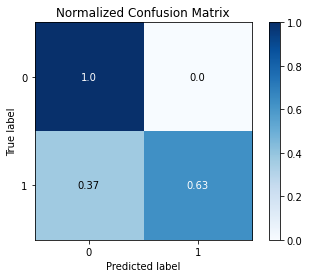

In [14]:
# gerar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

Como dito anteriormente, é preciso balancear os dados para obter um melhor desempenho do modelo, para isso será utilizada a técnica `under-sampling`.

In [15]:
# balancear os dados
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Para garantir que os dados estão balanceados, é importante plotar o mesmo gráfico de barras como anteriormente.

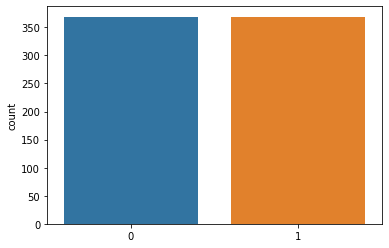

In [16]:
# plotar um gráfico de barras para verificar o balanceamento dos dados
sns.countplot(y_rus);

É muito importante analisar a correlação entre as variáveis do dataset e para isso utilizamos o mapa de calor. Nesse caso, é possível fazer uma comparação entre a correlação das variáveis com os dados desbalanceados e balanceados, fazendo toda a diferença no desempenho do modelo.

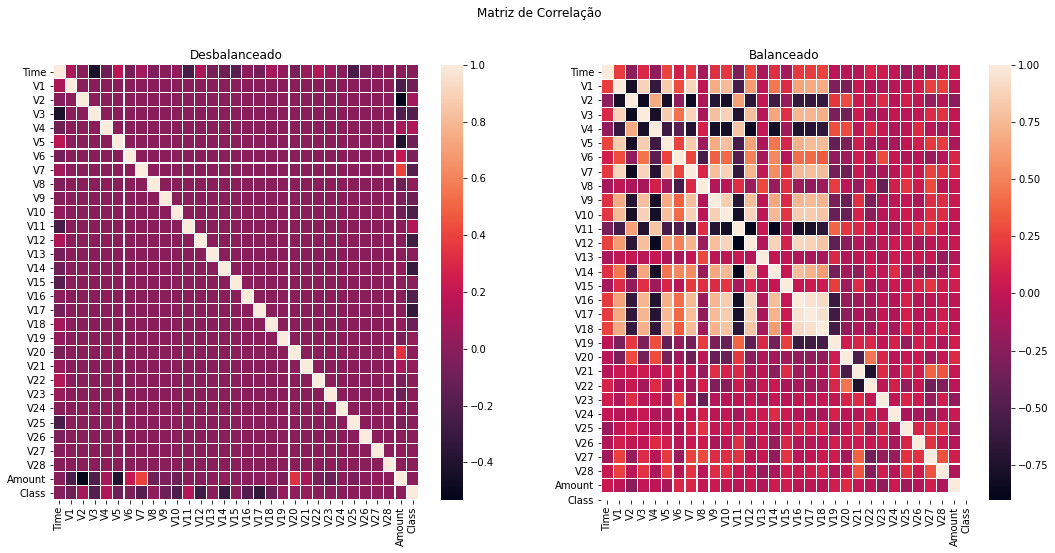

In [17]:
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns,
            linewidths=.1, ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=df.columns, yticklabels=df.columns,
            linewidths=.1, ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Com os dados já balanceados, um novo modelo, um novo relatório de classificação e uma nova matriz de confusão serão gerados, com o fim de comparar os resultados.

In [18]:
# escolher a classe do modelo e hiperparâmetros
model_rus = LogisticRegression()

# fit do modelo (treinar o modelo)
model_rus.fit(X_rus, y_rus)

# aplicar o modelo aos dados novos
y_pred_rus = model_rus.predict(X_test)

In [19]:
# gerar o relatório de classificação
print(classification_report(y_test, y_pred_rus, digits=4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_rus)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_rus)))

              precision    recall  f1-score   support

           0     0.9999    0.9574    0.9782     71079
           1     0.0366    0.9350    0.0705       123

    accuracy                         0.9574     71202
   macro avg     0.5183    0.9462    0.5243     71202
weighted avg     0.9982    0.9574    0.9766     71202

Acurácia: 0.9574

AUC: 0.9462



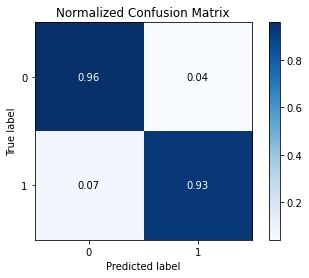

In [20]:
# gerar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus, normalize=True);

## Conclusão

Foi possível observar uma diferença exorbitante entre os modelos com dados desblanceados e balanceados.

Comparando os dois modelos, tivemos uma diminuição na acurácia do segundo (dados balanceados) para o primeiro modelo (dados desbalanceados), que passou de quase 100% para aproximadamente 96%, porém isso não quer dizer que o primeiro modelo é melhor. Com a matriz de confusão foi possível observar que o segundo modelo apresentou apenas 7% de erros falsos positivos enquanto o primeiro apresentou cerca de 37% desses erros, ou seja, 37% das fraudes que ocorreram foram classificadas como transações normais no primeiro modelo.

Desse modo, é possível concluir que o segundo modelo, que apresenta os dados balanceados possui um desempenho melhor, garantindo uma melhor acertabilidade dos resultados.

Segue meu [Linkedin](https://www.linkedin.com/in/pedropcunha/) para contato e meu portifólio no [github](https://github.com/pedsrc/data_science) para mais projetos.